In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.c_country import C_Country
from utils.graph_generator import get_path

from utils.dotdict import dotdict
from utils.params import init_graph, get_centrum
from utils.params import GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4, get_moving


import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")

import os
import pickle



In [2]:
import networkx as nx

In [3]:
args = {
    "--p_moving": 0.015, 
    "--p_worker": 1.0, 
    "--beta": 0.5,
    "--beta_super":0.0, 
    "--seed": 0,
    "--sigma": 1.0, 
    "--gamma": 0.2,
    "--max_sim": 500,
    "inf_agent_num":1000,
}

# Degree distribution

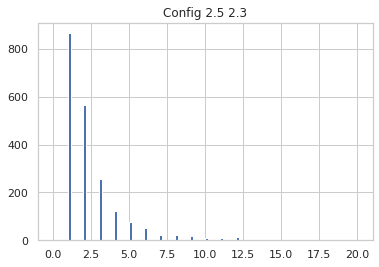

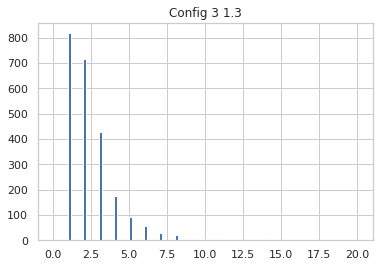

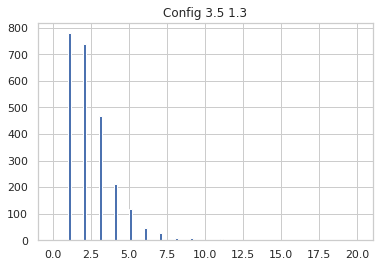

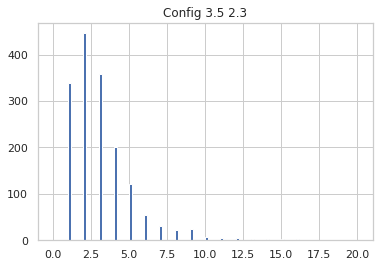

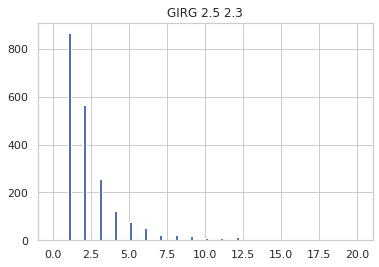

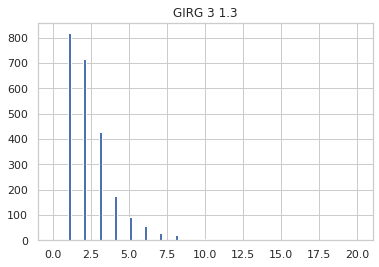

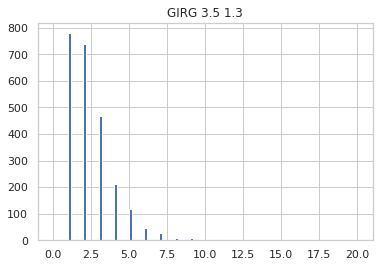

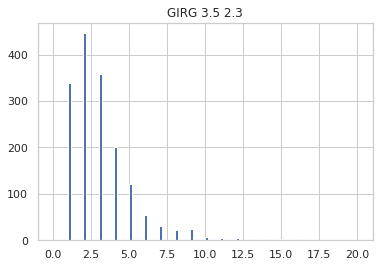

CPU times: user 14min 52s, sys: 5min 45s, total: 20min 38s
Wall time: 12min 23s


In [4]:
%%time
for config in [True, False]:
    for GIRG_args in [GIRG_args1, GIRG_args2, GIRG_args3, GIRG_args4]:        
        GIRG_args["N"]=5000
        GIRG_args["config_model"]=config
        GIRG_args["random_seed"]=0
        graph = init_graph(GIRG_args)
        
        degree = nx.degree(graph)
        plt.hist(dict(degree).values(), bins=100, range=(0,20))
        #plt.yscale('log')
        plt.title("{} {} {}".format("Config" if GIRG_args["config_model"] else "GIRG", GIRG_args["tau"], GIRG_args["alpha"]))
        plt.show()

In [5]:
GIRG_args1

{'name': 'GIRG',
 'N': 5000,
 'tau': 2.5,
 'alpha': 2.3,
 'C_1': 0.8,
 'whished_edgenum': 3000,
 'pop_in_city': 2000,
 'random_seed': 0,
 'verbose': False,
 'config_model': False,
 'edge_weigth': 10.638296872340426}

# Hierarchical graphs

[0, 1, 2, 3, 4] 1 4


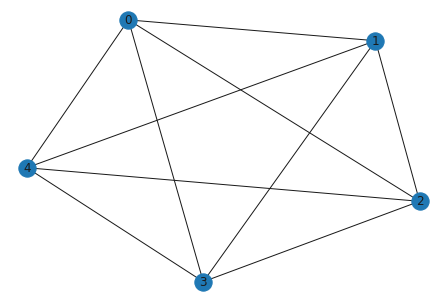

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 5 20


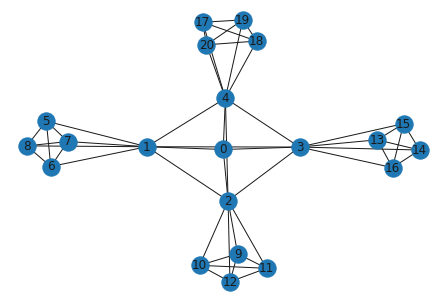

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84] 21 84


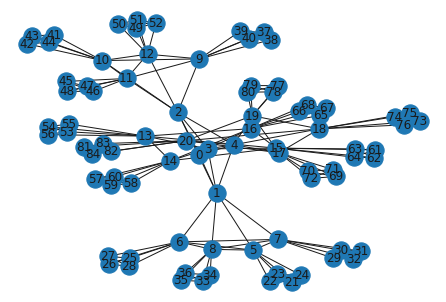

In [4]:
def extend_leafes(graph, n1, n2, k=4):
    ind0 = len(graph)
    
    for x in range(n2-n1+1):
        for j1 in range(k):
            x1 = ind0+k*x+j1
            graph.add_edge(n1+x,x1)
            #print(n1+x,x1)
            for j2 in range(j1+1,k):
                x2 = ind0+k*x+j2
                graph.add_edge(x1,x2)
                #print(x1,x2)

    return graph,ind0,x1

def get_hierarchical_graph(k, head):
    graph = nx.Graph()
    graph.add_node(0)
    a,b = 0,0

    shells = [[0]]
    for i in range(k):
        graph,a,b = extend_leafes(graph, a, b)
        shells.append(list(range(a,b+1)))
    
    if(head != None):
        n = head["n"]
        for i in range(int(head["p1"]*n*n/2)):
            u,v = np.random.randint(0,n,2)
            #print(u,v)
            graph.add_edge(u,v)
        
        N = len(graph)
        for i in range(int(head["p2"]*N*N/2)):
            u,v = np.random.randint(0,N,2)
            graph.add_edge(u,v)
    
    return graph, shells

    
graph = nx.Graph()
graph.add_node(0)

graph,a,b = extend_leafes(graph, 0, 0)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

graph,a,b = extend_leafes(graph, a, b)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

graph,a,b = extend_leafes(graph, a, b)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()


In [5]:
for i in range(1,5):
    print(i,sorted(dict(graph[i]).keys()))
    
print(i,sorted(dict(graph[20]).keys()))

1 [0, 2, 3, 4, 5, 6, 7, 8]
2 [0, 1, 3, 4, 9, 10, 11, 12]
3 [0, 1, 2, 4, 13, 14, 15, 16]
4 [0, 1, 2, 3, 17, 18, 19, 20]
4 [4, 17, 18, 19, 81, 82, 83, 84]


graph size:  84


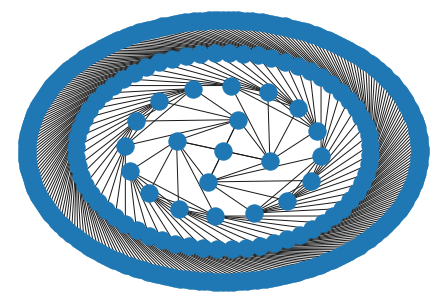

In [6]:
graph,shells = get_hierarchical_graph(4, None)

#print(80,sorted(dict(graph[80]).keys()))
print("graph size: ", b)

pos = nx.shell_layout(graph, shells)
nx.draw(graph, pos = pos)
plt.show()

In [7]:

len(graph)

341

In [8]:
ss = [10,20,40,60]

inp_args = {
    "--s_nonlin": str(len(ss))+" "+" ".join([str(s) for s in ss]),
    "--seed":0,
    "--mode":"simulation",
    "--verbose":False,
    "sim_num":500,
    "log_folder":"data"
}

In [9]:
for i in range(1,10):
    graph,shells = get_hierarchical_graph(i, head=None)
    print(i,":", len(graph))

1 : 5
2 : 21
3 : 85
4 : 341
5 : 1365
6 : 5461
7 : 21845
8 : 87381
9 : 349525


In [10]:
%%time

import pandas as pd
from utils.params import init_graph, get_centrum
from scripts.GPU_percolation_script import run_nets2
from utils.ecl_utils import get_graphstream

centrum = list(range(84+1))
graph,shells = get_hierarchical_graph(6, head={"n":84, "p1":0.1, "p2":0.000})
ps = np.concatenate(
    (np.linspace(0,0.05, 12),
     np.linspace(0.05, 0.2, 15)[1:])
)
ps = np.linspace(0,0.5, 20)

print("Graph size: ", len(graph))

nx.set_edge_attributes(graph, 1,"weight")
g_stream = get_graphstream(graph, centrum, {"verbose":False})
run_nets2(inp_args, g_stream, ps)

Graph size:  5461
Network 9
['--s_nonlin', '4', '10', '20', '40', '60', '--seed', '0', '--mode', 'simulation', '--verbose', 'False', 'sim_num', '500', 'log_folder', 'data', '--p_nonlin', '20', '0.0', '0.02631578947368421', '0.05263157894736842', '0.07894736842105263', '0.10526315789473684', '0.13157894736842105', '0.15789473684210525', '0.18421052631578946', '0.21052631578947367', '0.23684210526315788', '0.2631578947368421', '0.2894736842105263', '0.3157894736842105', '0.3421052631578947', '0.3684210526315789', '0.39473684210526316', '0.42105263157894735', '0.4473684210526315', '0.47368421052631576', '0.5', '--per', 'False']
>>> Params: p=0 seed=0 verbose=True
>>> GPU: NVIDIA GeForce RTX 2080 Ti with 68 SMs and 1024 mTpSM (1545.0 MHz and 7000.0 MHz)
>>> Init time = 542331[ms]
>>> Input read.
GPU variables initialized
>>> Reading input time = 234670[ms]
Keys: 
Values: 
Values (good): 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



CPU times: user 1.93 s, sys: 128 ms, total: 2.06 s
Wall time: 4.21 s


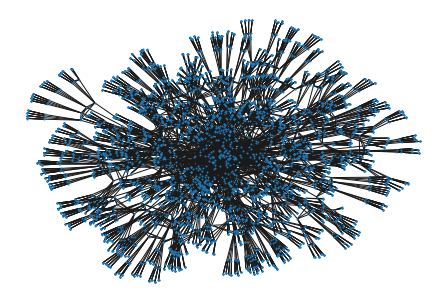

In [11]:
#pos = nx.shell_layout(graph, shells)
nx.draw(graph, node_size=1)
plt.show()

In [ ]:
df = pd.read_csv("data/grid_median_all_-1_-1.csv")

plt.figure(figsize=(10,12))

for s in ss:
    plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

plt.xlabel("p")
plt.ylabel("Ratio")
plt.legend()
plt.title("Hierarchical graph")